download https://www.kaggle.com/mahmoudreda55/satellite-image-classification?select=data

- menggunakan arsitektu vgg16

In [61]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from sklearn import metrics
from sklearn.metrics import classification_report

In [62]:
img_size = 128
def preprocess(image:np.array)->np.array:
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))      # untuk CNN karena bentuknya tetap, jadi perlu disamakan dulu bentuknya
    img = np.array(img)
    # img = img.astype("float32")
    img = img/255.0
    return img

In [63]:
path = "images"
x = []
y = []
for label in os.listdir(path):
    print(label)
    subdir = os.path.join(path, label)
    for fileName in os.listdir(subdir):
        # print(fileName)     # untuk nama
        # print(os.path.join(subdir, fileName))   # ini untuk mendapatkan path lengkapnya
        filePath = os.path.join(subdir, fileName)
        img = cv2.imread(filePath)
        img = preprocess(img)
        x.append(img)
        y.append(label)


desert
cloudy
green_area
water


In [64]:
x = np.array(x)
y = np.array(y)
x.shape, y.shape

# ((5631, 128, 128, 3), (5631,))
# 5631      -> jumlah gambar
# 128, 128  -> size gambar
# 3         -> channel rgb

((5631, 128, 128, 3), (5631,))

In [65]:
y[:10]

array(['desert', 'desert', 'desert', 'desert', 'desert', 'desert',
       'desert', 'desert', 'desert', 'desert'], dtype='<U10')

In [66]:
y[-1]

'water'

In [67]:
y[:10]

array(['desert', 'desert', 'desert', 'desert', 'desert', 'desert',
       'desert', 'desert', 'desert', 'desert'], dtype='<U10')

karena y masih dalam bentuk, harus di encode dulu

In [68]:
ec = OneHotEncoder()
y = ec.fit_transform(y.reshape(-1,1)).toarray()

In [69]:
y[-1]

array([0., 0., 0., 1.])

In [70]:
y.shape
# (5631, 4) -> jadi 4 dimensi

(5631, 4)

In [71]:
n_class = y.shape[-1]   # ambil kelasnya ada berapa
print(n_class)

4


In [72]:
lr = 0.01           # learning rate
n_epochs = 50       # banyaknya percobaan, 50
batch_size = 32     # diitearsi setiap satu eksekusi langsung di ambil 32 gambar, awalnya 32 gambar

In [73]:
model = tf.keras.Sequential()

ikutin vgg16

In [74]:
# # Convolutional 1
# model.add(tf.keras.layers.Conv2D(input_shape=(img_size, img_size, 3), filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# # Convolutional 2
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# # Convolutional 3
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# # masuk ke fully connected layer
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=100, activation='relu'))
# model.add(tf.keras.layers.Dense(units=100, activation='relu'))
# model.add(tf.keras.layers.Dense(units=n_class, activation='softmax'))

# model.summary()

In [75]:
# Convolutional 1
model.add(tf.keras.layers.Conv2D(input_shape=(img_size, img_size, 3), filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Convolutional 2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Convolutional 3
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# masuk ke fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=n_class, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)      

In [76]:
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
# hist = model.fit(x, y, verbose=1, epochs=n_epochs, batch_size=batch_size)

hist = keras.models.load_model('a-satellite_image_classification_model/model.h5')

In [78]:
# # assign location
# path_model='a-satellite_image_classification_model/model.h5'
# path_model_weight='a-satellite_image_classification_model/weights.h5'
 
# # save
# model.save(path_model)
# model.save_weights(path_model_weight)

# print('Model Saved!')

In [79]:
# plt.plot(model.history["accuracy"],'b')
# plt.plot(hist.history["loss"],'r')
# plt.show()

## Test the model

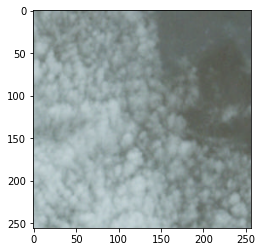

In [91]:
# train_12.jpg
img = cv2.imread('images/cloudy/train_101.jpg')
# img = cv2.imread('images/desert/desert(15).jpg')
# img = cv2.imread('images/green_area/Forest_23.jpg')
# img = cv2.imread('images/water/SeaLake_82.jpg')
# img = cv2.imread('a-satellite_image_test/test_1.jpg')
plt.imshow(img)

In [92]:
img.shape

(256, 256, 3)

In [93]:
# karena bentuknya 3 dimensi, tpi model kita 4 dimensi, maka harus di ubah dulu
img = preprocess(img)
img = np.expand_dims(img, axis=0)
img.shape
# disini udah 4 dimensi

(1, 128, 128, 3)

In [94]:
y_pred = model.predict(img) # bentuk datanya 
print(y_pred)
# print(y_pred[0][0])

[[0.25041777 0.25335526 0.24711208 0.24911486]]


In [84]:
y_pred.shape, y.shape

((1, 4), (5631, 4))

In [85]:
# acc = metrics.accuracy_score(y_pred, y[:1])
# # print(f'Accuracy: {acc}')

# path = "images"
# X = []
# Y = []
# for label in os.listdir(path):
#     print(label)
#     subdir = os.path.join(path, label)
#     for fileName in os.listdir(subdir):
#         # print(fileName)     # untuk nama
#         # print(os.path.join(subdir, fileName))   # ini untuk mendapatkan path lengkapnya
#         filePath = os.path.join(subdir, fileName)
#         img = cv2.imread(filePath)
#         img = preprocess(img)
#         x.append(img)
#         y.append(label)
#         # acc = metrics.accuracy_score(y_pred, y)

In [86]:
y_pred_dec = ec.inverse_transform(y_pred)
y_pred_dec
# print(y_pred_dec[0][0])

array([['desert']], dtype='<U10')

In [87]:
# # # acc = metrics.accuracy_score(y_pred, y)
# # # print(f'Accuracy: {acc}')

# # for y_img in x:
# #     print(y_img.shape)
# #     # acc = metrics.accuracy_score(y_pred, y_img)
# idx = np.argmax(y_pred)
# print(y_pred[idx])

In [88]:
# print(metrics.classification_report(y_pred, ))